# HW6

## MSDS-7337
## Author: Taylor Bonar
---
1.	Evaluate text similarity of Amazon book search results by doing the following:
    * Do a book search on Amazon via the search box. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results. 
    * In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 
    * Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

In [1]:
corpus_book_titles = [
    'The Silent Patient',
    'The Silent Patient: A True Story',
    'The Maidens',
    'The Push: A Novel',
    'The Patient',
    'Verity',
    'The Searcher: A Novel',
    'Where the Crawdads Sing',
    'Then She Was Gone: A Novel',
    'The Couple Next Door: A Novel',
    'The Black Book (A Billy Harney Thriller, 1)',
    'The Midnight Library: A Novel',
    'The Guardians: A Novel',
    'American Dirt (Oprah\'s Book Club): A Novel',
    'The Seven Husbands of Evelyn Hugo: A Novel',
    'AGATHA CHRISTIE Premium Collection',
    'The Last Thing He Told Me: A Novel',
    'Tattooist Of Auschwitz',
    'Mind Games',
    'The Last Mrs. Parrish: A Novel',
    'Family Money',
    'Project Hail Mary: A Novel',
    'All the Light We Cannot See: A Novel',
    'The Night She Disappeared: A Novel'
]

References
* Medium Article: https://medium.com/geekculture/different-ways-to-calculate-cosine-similarity-in-python-ae5bb28c372c
* StackOverflow: https://stackoverflow.com/questions/54681776/map-the-most-similar-cosine-ranking-document-back-to-each-respective-document-in
* Sklearn documentation

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

In [36]:
vectorizer = TfidfVectorizer()

# Use Tfid from SKLearn on our book titles from Amazon so we get a sparse matrix of n_samples and n_features via tf-idf weighted document-term matrix
tfidf_matrix = vectorizer.fit_transform(corpus_book_titles)

# Translating to pandas dataframe to show calculations of vocabulary and idf
document_term_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=corpus_book_titles)

document_term_matrix_df.head()

,agatha,all,american,auschwitz,billy,black,book,cannot,christie,club,...,the,then,thing,thriller,told,true,verity,was,we,where
The Silent Patient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.312355,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
The Silent Patient: A True Story,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.207624,0.0,0.0,0.0,0.0,0.528285,0.0,0.0,0.0,0.0
The Maidens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.365779,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
The Push: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337599,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
The Patient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.439426,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [39]:
tfidf_matrix[0]

<1x64 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [47]:

# DF to hold similarities so we can get idxmax() later
cos_df = pd.DataFrame(columns=["Book Title 1", "Most Similar Book Title", "SimilarityPercentage"])

for idx in range(len(corpus_book_titles)):
    # tf-idf in sklearn produces normalized vectors :. cosine_similarity is equivalent to linear_kernel, but slower. Let's use linear_kernal, b/c gotta go fast
    # compare row 1 and row 2 and calculate cosine similarity
    cosine_similarities = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    # make pairs of (index, similarity)
    cosine_similarities = list(enumerate(cosine_similarities))
    # delete the cosine similarity with itself
    cosine_similarities.pop(idx)
    # get the tuple with max similarity
    most_similar, similarity = max(cosine_similarities, key=lambda t:t[1])
    cos_df.loc[len(cos_df)] = [corpus_book_titles[idx], corpus_book_titles[most_similar], similarity]
    
most_sim = cos_df.iloc[cos_df.SimilarityPercentage.idxmax()]
least_sim = cos_df.iloc[cos_df.SimilarityPercentage.idxmin()]

print(f"""Most Similar Book Titles:
{most_sim}
      
Most Dissimilar Book Titles:
{least_sim}
""")

Most Similar Book Titles:
Book Title 1               The Silent Patient
Most Similar Book Title           The Patient
SimilarityPercentage                 0.710825
Name: 0, dtype: object
      
Most Dissimilar Book Titles:
Book Title 1                           Verity
Most Similar Book Title    The Silent Patient
SimilarityPercentage                        0
Name: 5, dtype: object



The most similar book titles shown on Amazon's search "The Silent Patient" are the:
* The Silent Patient
* The Patient

These were the first two books shown on the list.

While there is a tie for the least similar books:
* The Silent Patient and Verity (Listing 6)
* AGATHA CHRISTIE Premium Collection (Listing 16) and The Silent Patient
* Mind Games (Listing 19) and The Silent Patient
* Family Money (Listing 21) and The Silent Patient

This is no surprise as the titles contain very different words.


2.	Now evaluate using a major search engine.
    * Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 
    * Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 
    * Which one has the highest similarity measure? 



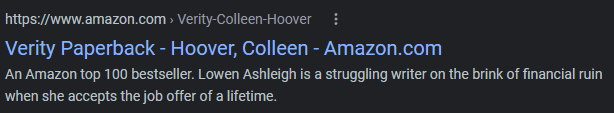

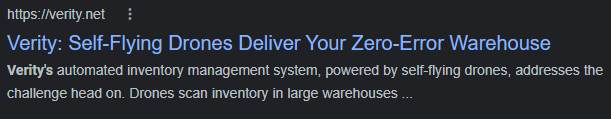

In [49]:
from IPython.display import Image, display

listOfImageNames = ['./Google_Result1.png',
                    './Google_Result20.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

In [50]:
vectorizer = TfidfVectorizer()

documents = ["Verity Paperback - Hoover, Collen - Amazon.com", "Verity: Self-Flying Drones Deliver Your Zero-Error Warehouse"]

# Use Tfid from SKLearn on our book titles from Amazon so we get a sparse matrix of n_samples and n_features via tf-idf weighted document-term matrix
tfidf_matrix2 = vectorizer.fit_transform(documents)

for idx in range(len(documents)):
    # tf-idf in sklearn produces normalized vectors :. cosine_similarity is equivalent to linear_kernel, but slower. Let's use linear_kernal, b/c gotta go fast
    # compare row 1 and row 2 and calculate cosine similarity
    cosine_similarities = linear_kernel(tfidf_matrix2[idx], tfidf_matrix2).flatten()
    # make pairs of (index, similarity)
    cosine_similarities = list(enumerate(cosine_similarities))
    
cosine_similarities

[(0, 0.07397129483465995), (1, 1.0)]

The Amazon listings have the higher similarities